#### random forest cơ bản.

Model evaluation for Random Forest Regression
Mean Squared Error: 2.7662104892357338
Train MAE: 0.15397727272727274
Validation MAE: 0.4365561904761904
Test MAE: 0.47384422554347827
Test Score: 0.959049118083185
Train Score: 0.9951055049190252
Cross Validation Score: [0.90010106 0.87891774 0.94577891 0.92441461 0.95993748]
Mean of Cross Validation Score: 0.9218299621952676


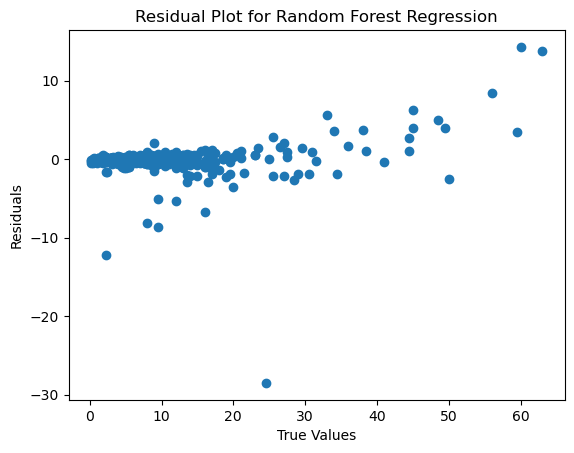

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error


data = pd.read_csv('../data/processed/dataset.csv')
# Define features and target
features = ['overall',
 'potential','age','height_cm','weight_kg','league_rank','pace','shooting',
 'passing','dribbling','defending','physic','gk_diving','gk_handling','gk_kicking',
 'gk_reflexes','gk_speed','gk_positioning','attacking_crossing','attacking_finishing',
 'attacking_heading_accuracy','attacking_short_passing','attacking_volleys','skill_dribbling',
 'skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control',
 'movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions',
 'movement_balance','power_shot_power','power_jumping','power_stamina',
 'power_strength','power_long_shots','mentality_aggression','mentality_interceptions',
 'mentality_positioning','mentality_vision','mentality_penalties','mentality_composure',
 'defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling',
 'goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes','wage_eur']
target = 'value_eur'

data['wage_eur'] = data['wage_eur'] / 1000
data['value_eur'] = data['value_eur'] / 1000000

# Split data into features (X) and target (y)
X = data[features]
y = data[target]

# Chia dữ liệu thành tập huấn luyện và tập tạm thời (bao gồm tập validation và tập kiểm tra)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# Chia tập tạm thời thành tập validation và tập kiểm tra
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Evaluate model
print("Model evaluation for Random Forest Regression")

mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"Train MAE: {mae_train}")
print(f"Validation MAE: {mae_val}")
print(f"Test MAE: {mae_test}")

test_score = model.score(X_test, y_test)
print(f"Test Score: {test_score}")

train_score = model.score(X_train, y_train)
print(f"Train Score: {train_score}")

cv_score = cross_val_score(model, X_val, y_val, cv=5)
print(f"Cross Validation Score: {cv_score}")
print(f"Mean of Cross Validation Score: {cv_score.mean()}")

# Residual plot
plt.scatter(y_test, y_test - y_test_pred)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Random Forest Regression')
plt.show()


#### tunning parameter with GridSearch cho random forest.

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; tot

/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
648 fits failed out of a total of 1944.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
454 fits failed with the following error:
Traceback (most recent call last):
  File "/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/base.py", line 

Best parameters found: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Random Forest - Mean Squared Error: 4.716605907726804
Best Random Forest - R2 Score: 0.9301755335224557


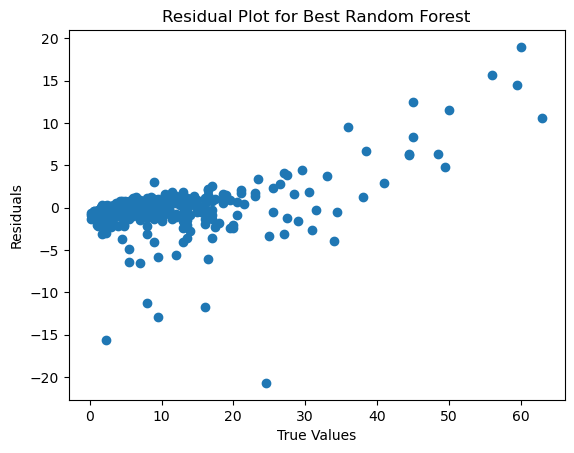

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

data = pd.read_csv('../data/processed/dataset.csv')
# Define features and target
features = ['overall',
 'potential','age','height_cm','weight_kg','league_rank','pace','shooting',
 'passing','dribbling','defending','physic','gk_diving','gk_handling','gk_kicking',
 'gk_reflexes','gk_speed','gk_positioning','attacking_crossing','attacking_finishing',
 'attacking_heading_accuracy','attacking_short_passing','attacking_volleys','skill_dribbling',
 'skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control',
 'movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions',
 'movement_balance','power_shot_power','power_jumping','power_stamina',
 'power_strength','power_long_shots','mentality_aggression','mentality_interceptions',
 'mentality_positioning','mentality_vision','mentality_penalties','mentality_composure',
 'defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling',
 'goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes','wage_eur']
target = 'value_eur'

data['wage_eur'] = data['wage_eur'] / 1000
data['value_eur'] = data['value_eur'] / 1000000

# Split data into features (X) and target (y)
X = data[features]
y = data[target]

# Chia dữ liệu thành tập huấn luyện và tập tạm thời (bao gồm tập validation và tập kiểm tra)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# Chia tập tạm thời thành tập validation và tập kiểm tra
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Thiết lập GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Huấn luyện GridSearchCV với y_train.ravel()
grid_search.fit(X_train_scaled, y_train.values.ravel())

# In ra các tham số tốt nhất
print(f"Best parameters found: {grid_search.best_params_}")

# Huấn luyện mô hình với tham số tốt nhất
best_rf = grid_search.best_estimator_
best_rf.fit(X_train_scaled, y_train.values.ravel())

# Dự đoán với mô hình tốt nhất
best_rf_y_pred = best_rf.predict(X_test_scaled)

# Đánh giá mô hình tốt nhất
mse_best_rf = mean_squared_error(y_test, best_rf_y_pred)
r2_best_rf = r2_score(y_test, best_rf_y_pred)
print(f"Best Random Forest - Mean Squared Error: {mse_best_rf}")
print(f"Best Random Forest - R2 Score: {r2_best_rf}")

# Vẽ đồ thị residual
plt.scatter(y_test.values.ravel(), y_test.values.ravel() - best_rf_y_pred)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Best Random Forest')
plt.show()


#### tunning parameter with random search cho random forest.

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=763; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=763; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=9, n_estimators=763; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=591

/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
96 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/base.py", line 637

Best parameters found: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 234}
Best Random Forest (Random Search) - Mean Squared Error: 5.040181591334961
Best Random Forest (Random Search) - R2 Score: 0.9253853305852051


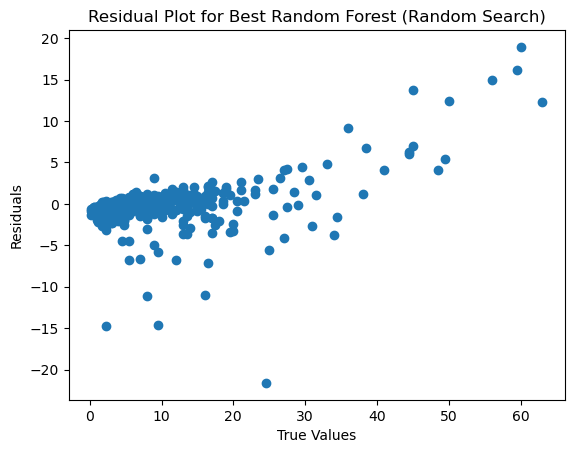

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from scipy.stats import randint

# Giả sử bạn đã có data
# data = pd.read_csv('path_to_your_data.csv')

# Chọn đặc trưng và target
feature = ['overall',
 'potential','age','height_cm','weight_kg','league_rank','pace','shooting',
 'passing','dribbling','defending','physic','gk_diving','gk_handling','gk_kicking',
 'gk_reflexes','gk_speed','gk_positioning','attacking_crossing','attacking_finishing',
 'attacking_heading_accuracy','attacking_short_passing','attacking_volleys','skill_dribbling',
 'skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control',
 'movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions',
 'movement_balance','power_shot_power','power_jumping','power_stamina',
 'power_strength','power_long_shots','mentality_aggression','mentality_interceptions',
 'mentality_positioning','mentality_vision','mentality_penalties','mentality_composure',
 'defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling',
 'goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes','wage_eur']
target = ['value_eur']

X = data[feature]
y = data[target]

# Chia dữ liệu thành tập huấn luyện và tập tạm thời (bao gồm tập validation và tập kiểm tra)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# Chia tập tạm thời thành tập validation và tập kiểm tra
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Thiết lập RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=100, cv=3, n_jobs=-1, verbose=2, random_state=42, scoring='r2')

# Huấn luyện RandomizedSearchCV với y_train.ravel()
random_search.fit(X_train_scaled, y_train.values.ravel())

# In ra các tham số tốt nhất
print(f"Best parameters found: {random_search.best_params_}")

# Huấn luyện mô hình với tham số tốt nhất
best_rf_random = random_search.best_estimator_
best_rf_random.fit(X_train_scaled, y_train.values.ravel())

# Dự đoán với mô hình tốt nhất
best_rf_random_y_pred = best_rf_random.predict(X_test_scaled)

# Đánh giá mô hình tốt nhất
mse_best_rf_random = mean_squared_error(y_test, best_rf_random_y_pred)
r2_best_rf_random = r2_score(y_test, best_rf_random_y_pred)
print(f"Best Random Forest (Random Search) - Mean Squared Error: {mse_best_rf_random}")
print(f"Best Random Forest (Random Search) - R2 Score: {r2_best_rf_random}")

# Vẽ đồ thị residual
plt.scatter(y_test.values.ravel(), y_test.values.ravel() - best_rf_random_y_pred)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Best Random Forest (Random Search)')
plt.show()
